# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [1]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0:0, 4: 1})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: 0, 4: 1})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]
test_df = test_df[(test_df["target"] == 0) | (test_df["target"] == 4)]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: 0, 4: 1})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (359, 6)
   target  id                          date     flag      user  \
0       1   3  Mon May 11 03:17:40 UTC 2009  kindle2  

In [2]:
train_df.shape

(1600000, 6)

In [3]:
from sklearn.model_selection import train_test_split

_, new_train = train_test_split(train_df, test_size= 0.1, stratify=train_df['target'])

In [4]:
train_df = new_train

<Axes: ylabel='Frequency'>

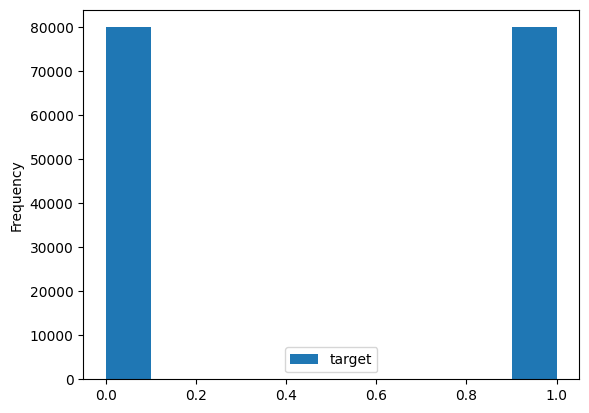

In [5]:
train_df.plot(y="target", kind="hist")

<Axes: ylabel='text'>

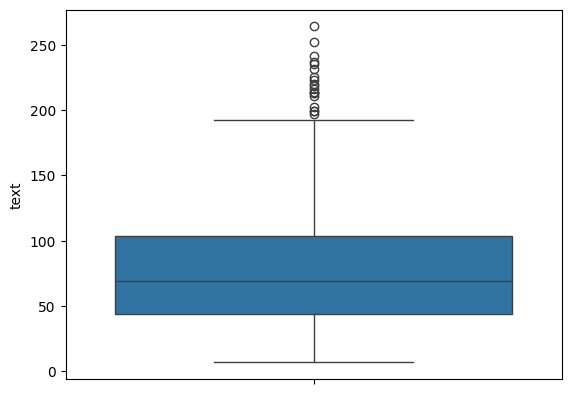

In [6]:
import seaborn as sns

train_tweet_length = train_df["text"].map(len)

sns.boxplot(y=train_tweet_length)

In [7]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 48.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy
nlp = spacy.load('en_core_web_md')

In [9]:
import re, string
def clean_text (tweet_text: str):
    #remove tags
    intermediate = re.sub(pattern=r'@\w+', repl="",string=tweet_text)
    #remove links
    intermediate = re.sub(pattern=r'(https?://)(www.)?(\w)+\.(\w|/)+', repl="", string=intermediate)
    #remove emojis
    intermediate = re.sub(pattern=r'(:|;|>|<)-?[a-zA-Z0-9]?', repl="", string=intermediate)
    #remove punctuation
    intermediate = re.sub(pattern='[%s]' % re.escape(string.punctuation), repl="", string=intermediate)
    #convert everything to lower
    intermediate = intermediate.lower()
    #add numbers token
    intermediate = re.sub(pattern=r"\d+", repl="NUM", string=intermediate)
    return intermediate

In [10]:
pre_clean_series = train_df['text']

clean_series = train_df['text'].map(clean_text)

In [11]:
from tqdm import tqdm
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.lm import Vocabulary
def vocab_builder(text_data, min_freq = 5):
    flat_vocab = np.array([])

    for entry in tqdm(text_data):
        words = word_tokenize(entry)
        flat_vocab = np.append(flat_vocab, words)

    print(flat_vocab.shape)

    vocab = Vocabulary(flat_vocab, unk_cutoff=1)

    return vocab

#this implementation is extremely slow. The limitation is the word_tokenize function of nltk


In [12]:
from collections import Counter
def vocab_builder(text_data, min_freq = 5):
    word_counter = Counter()
    tokenizer = spacy.blank('en')
    for entry in tqdm(tokenizer.pipe(text_data)):
        for word in entry:
            word_counter[word.text] += 1

    word2id = {}
    id2word = {}

    for word, count in word_counter.most_common():
        wid = len(word2id) + 1
        word2id[word] = wid
        id2word[wid] = word

    return word2id, id2word


In [13]:
orig_word2id, orig_id2word = vocab_builder(pre_clean_series)
cleaned_word2id, cleaned_id2word = vocab_builder(clean_series)

160000it [00:27, 5914.54it/s]
160000it [00:14, 10682.36it/s]


In [14]:
print(len(orig_id2word), len(cleaned_id2word))

170483 90852


In [15]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
from nltk.stem.porter import PorterStemmer


lemmatizer_model = spacy.load("en_core_web_sm", exclude=["parser", "ner", "senter"])

stemmer = PorterStemmer()


In [17]:

output = lemmatizer_model("I ran to the homing sending sent")
lemmas = list(token.lemma_ for token in output)
print(" ".join(lemmas))

I run to the homing send send


In [18]:
def lemmatizing(text: str):
    output = lemmatizer_model(text=text)
    lemmas = list(token.lemma_ for token in output if token.lemma_ != " ")
    return " ".join(lemmas).strip()

In [19]:
port_data = clean_series.map(stemmer.stem)
print('done stemming')
lemma_data = clean_series.map(lemmatizing)

done stemming


In [20]:
lemma_data

,text
392498,wow I get like an hour of sleep
912783,you re welcome
260780,dear peguin wake up please
503116,thank but mine be not a big stageit effin smal...
663933,but after talk to my mom maybe he s not
...,...
1121340,I wanna drink
906846,on my way to a finalthe road be really wet hmm...
1237638,I hate you right now
1580705,I m up finally get ready for work


In [21]:
stemmer.stem("goes")

'goe'

In [22]:
train_port, test_port, y_train_port, y_test_port = train_test_split(port_data, train_df['target'], test_size=0.2, stratify=train_df['target'])
train_lemma, test_lemma, y_train_lemma, y_test_lemma = train_test_split(lemma_data, train_df['target'], test_size=0.2, stratify=train_df['target'])

In [23]:
port_word2id, port_id2word = vocab_builder(train_port)
lemma_word2id, lemma_id2word = vocab_builder(train_lemma)

128000it [00:12, 10015.80it/s]
128000it [00:09, 13277.80it/s]


In [24]:
def port_vectorize(text: str, ):
    word_array = np.asarray(text.split())
    if len(word_array) > 40:
        word_array = word_array[0: 40]
    if len(word_array) < 40:
        word_array = np.append(word_array, np.zeros(40-len(word_array)))

    efficient_mapping = np.vectorize(lambda x: port_word2id.get(x, 0))

    sentence_vector = efficient_mapping(word_array)
    return sentence_vector

In [25]:
def lemma_vectorize(text: str, ):
    word_array = np.asarray(text.split())
    if len(word_array) > 40:
        word_array = word_array[0: 40]
    if len(word_array) < 40:
        word_array = np.append(word_array, np.zeros(40-len(word_array)))

    efficient_mapping = np.vectorize(lambda x: lemma_word2id.get(x, 0))

    sentence_vector = efficient_mapping(word_array)
    return sentence_vector

In [26]:
test_port.head()

,text
688327,im sorry kii couldnt go to balikpapan
616925,going to grandpas gravee with my grandma
325764,bad mood i need chocolate and a milkshak
326630,i need a massagesuch sore muscles stupid exercis
1405557,aint seen this movie innawhile quiet like it ...


In [27]:
port_train_vectorized = train_port.map(port_vectorize)
lemma_train_vectorized = train_lemma.map(lemma_vectorize)
port_test_vectorized = test_port.map(port_vectorize)
lemma_test_vectorized = test_lemma.map(lemma_vectorize)

In [28]:
port_train_vectorized.head()

,text
1304751,"[31, 5, 2834, 2240, 3, 254, 6, 455, 10905, 269..."
29304,"[1618, 8, 40, 3205, 4158, 783, 2, 0, 153, 483,..."
141937,"[0, 401, 46, 31, 99, 473, 295, 563, 7, 0, 990,..."
767926,"[706, 202, 37, 6, 620, 40, 411, 13, 5, 1349, 1..."
774208,"[2, 66, 75, 9698, 1757, 122, 33, 24, 4, 3899, ..."


In [29]:
lemma_train_vectorized.head()

,text
276012,"[7393, 3517, 821, 830, 311, 1924, 2273, 38, 83..."
1324812,"[1457, 10334, 270, 15339, 97, 4047, 21, 297, 6..."
1286915,"[93, 7, 773, 2, 69, 31, 246, 15, 505, 57, 3626..."
485204,"[60, 2621, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
507512,"[20, 40, 51, 77, 93, 23, 17, 140, 248, 0, 0, 0..."


In [30]:
import pandas as pd


lemma_train_df = pd.DataFrame(np.stack(lemma_train_vectorized.values))
lemma_test_df = pd.DataFrame(np.stack(lemma_test_vectorized.values))
port_train_df = pd.DataFrame(np.stack(port_train_vectorized.values))
prt_test_df = pd.DataFrame(np.stack(port_test_vectorized.values))

In [31]:
port_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,31,5,2834,2240,3,254,6,455,10905,26938,...,0,0,0,0,0,0,0,0,0,0
1,1618,8,40,3205,4158,783,2,0,153,483,...,0,0,0,0,0,0,0,0,0,0
2,0,401,46,31,99,473,295,563,7,0,...,0,0,0,0,0,0,0,0,0,0
3,706,202,37,6,620,40,411,13,5,1349,...,0,0,0,0,0,0,0,0,0,0
4,2,66,75,9698,1757,122,33,24,4,3899,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)

In [33]:
model.fit(lemma_train_df, y_train_lemma)

RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)

In [34]:
model.score(lemma_test_df, y_test_lemma)

0.6145625

In [35]:
model = RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)
model.fit(port_train_df, y_train_port)

RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)

In [36]:
model.score(prt_test_df, y_test_port)

0.60353125

In [38]:
def pos_tagging(text: str, nlp_model):
    doc = nlp_model(text)
    lemmas = np.asarray(list(token.lemma_ for token in doc if token.lemma_ != " "))
    noun_count = 0
    verb_count = 0
    adj_count = 0
    for token in doc:
        if token.pos_ == "NOUN":
            noun_count += 1
        elif token.pos_ == "VERB":
            verb_count += 1
        elif token.pos_ == "ADJ":
            adj_count += 1
    if len(lemmas) > 40:
        lemmas = lemmas[0: 40]
    if len(lemmas) < 40:
        lemmas = np.append(lemmas, np.zeros(40-len(lemmas)))

    efficient_mapping = np.vectorize(lambda x: lemma_word2id.get(x, 0))

    sentence_vector = efficient_mapping(lemmas)
    output = np.append(sentence_vector, [noun_count, verb_count, adj_count])
    return output

clean_series = pd.DataFrame(clean_series)
lemma_pos_counts = clean_series['text'].apply(lambda x: pos_tagging(x, lemmatizer_model))
print(lemma_pos_counts.shape, type(lemma_pos_counts))


(160000,) <class 'pandas.core.series.Series'>


In [39]:
print(lemma_pos_counts.head())

392498    [249, 1, 18, 36, 89, 140, 15, 92, 0, 0, 0, 0, ...
912783    [8, 113, 338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
260780    [565, 0, 174, 33, 164, 0, 0, 0, 0, 0, 0, 0, 0,...
503116    [53, 23, 363, 2, 6, 5, 222, 38795, 2814, 695, ...
663933    [23, 142, 196, 3, 7, 277, 235, 56, 40, 6, 0, 0...
Name: text, dtype: object


In [40]:
lemma_pos_df = pd.DataFrame(np.stack(lemma_pos_counts.values))

In [41]:
lemma_pos_df.shape

(160000, 43)

In [42]:
train_lemma, test_lemma, y_train, y_test = train_test_split(lemma_pos_df, train_df['target'], test_size=0.2, stratify=train_df['target'])

In [43]:
model = RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)
model.fit(train_lemma, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)

In [44]:
model.score(test_lemma, y_test)

0.61884375

In [45]:
import numpy as np
import spacy

# Load the medium English model
nlp = spacy.load('en_core_web_md')

def word_vectors(text: str, nlp_model):
    """
    Generates a fixed-size vector for a text by averaging word vectors.

    Args:
        text (str): The input text.
        nlp_model: The spaCy NLP model with word vectors.

    Returns:
        np.ndarray: A fixed-size vector representation of the text.
    """
    doc = nlp_model(text)
    # Filter out tokens that are not words or have no vector
    word_tokens = [token for token in doc if token.has_vector and not token.is_punct and not token.is_space]

    if not word_tokens:
        # Return a zero vector if no valid tokens are found
        return np.zeros(nlp_model.vocab.vectors_length)

    # Get vectors for each word token
    vectors = [token.vector for token in word_tokens]

    # Average the word vectors to get a sentence vector
    sentence_vector = np.mean(vectors, axis=0)

    return sentence_vector

# Apply the updated word_vectors function to the cleaned data
# Assuming clean_series is a pandas Series containing the cleaned text data
word_vector_series = clean_series['text'].apply(lambda x: word_vectors(x, nlp))

# Convert the series of vectors to a DataFrame
word_vector_df = pd.DataFrame(word_vector_series.tolist())

print("Word vector dataframe shape:", word_vector_df.shape)
display(word_vector_df.head())

Word vector dataframe shape: (160000, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.663124,0.110451,-0.139536,-0.139049,-0.159364,-0.051485,0.043198,-0.266498,0.087788,1.625937,...,0.023001,-0.075737,-0.015600,-0.186022,0.031184,0.122160,-0.125431,-0.063794,0.021980,0.159944
1,-0.710277,0.153602,-0.428494,-0.203065,-0.151923,0.105917,0.166377,-0.483387,0.213840,2.437267,...,-0.366253,0.123650,-0.003362,0.066700,0.459057,0.288958,0.234806,-0.130997,-0.016506,0.276044
2,-0.694533,0.105480,-0.336425,-0.052549,-0.163063,-0.268975,0.091002,-0.050658,-0.126461,2.390000,...,0.026089,0.079222,-0.085779,-0.093969,0.121919,0.012200,-0.135407,0.083083,0.042093,-0.062257
3,-0.688118,0.036822,-0.286616,0.043200,-0.080914,0.026085,0.002796,-0.311550,-0.006464,1.853042,...,-0.139022,0.032313,-0.098581,-0.128576,0.190195,0.250029,0.059791,0.003771,0.029237,0.045328
4,-0.789622,0.204482,-0.229329,-0.153855,-0.044074,-0.089171,0.001098,-0.280523,0.044417,2.198488,...,-0.003635,0.078758,-0.207817,-0.148724,0.019424,0.251205,-0.088206,-0.068343,0.015122,0.028190


In [46]:
train_lemma, test_lemma, y_train, y_test = train_test_split(word_vector_df, train_df['target'], test_size=0.2, stratify=train_df['target'])

In [47]:
model = RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)
model.fit(train_lemma, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42)

In [48]:
model.score(test_lemma, y_test)

0.67546875

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import spacy

# Assuming nlp = spacy.load('en_core_web_md') is already defined

class WordVectorTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to generate word vectors using a spaCy model.
    """
    def __init__(self, nlp_model):
        self.nlp_model = nlp_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """
        Transforms a list or pandas Series of text data into a DataFrame of word vectors.

        Args:
            X: A list or pandas Series of text data.

        Returns:
            pd.DataFrame: A DataFrame where each row is the word vector for the corresponding text.
        """
        if isinstance(X, pd.Series):
            X = X.tolist()
        elif not isinstance(X, list):
            raise TypeError("Input must be a list or pandas Series of strings.")

        word_vector_list = [word_vectors(text, self.nlp_model) for text in X]

        # Stack the vectors to create a 2D numpy array
        word_vector_array = np.vstack(word_vector_list)

        return pd.DataFrame(word_vector_array)



In [50]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Define the pipeline with the custom transformer and classifier
pipeline_with_vectors = Pipeline([
    ('word_vectors', WordVectorTransformer(nlp)),  # Use the custom transformer
    ('classifier', RandomForestClassifier(n_estimators=400, n_jobs=6, random_state=42))
])

# Split the data using the cleaned text data before vectorization
# Assuming clean_series (containing cleaned text) and train_df['target'] are available
X_train_text, X_test_text, y_train, y_test = train_test_split(clean_series['text'], train_df['target'], test_size=0.2, random_state=42, stratify=train_df['target'])

# Train the pipeline
print("Training the pipeline with custom transformer...")
pipeline_with_vectors.fit(X_train_text, y_train)
print("Training complete.")

# Evaluate the pipeline
score = pipeline_with_vectors.score(X_test_text, y_test)
print(f"Pipeline accuracy on test set: {score}")

# Save the trained pipeline
model_filename = 'sentiment_pipeline_with_transformer.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(pipeline_with_vectors, f)
print(f"Pipeline saved to {model_filename}")

Training the pipeline with custom transformer...
Training complete.
Pipeline accuracy on test set: 0.67559375
Pipeline saved to sentiment_pipeline_with_transformer.pkl


In [51]:
%%writefile app.py
import flask
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin


# Load the spaCy model outside the request handler for efficiency
try:
    nlp = spacy.load('en_core_web_md')
except OSError:
    print("Downloading spaCy model...")
    from spacy.cli import download
    download('en_core_web_md')
    nlp = spacy.load('en_core_web_md')


# Define the custom transformer (must be the same as the one used in the pipeline)
class WordVectorTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to generate word vectors using a spaCy model.
    """
    def __init__(self, nlp_model):
        self.nlp_model = nlp_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """
        Transforms a list or pandas Series of text data into a DataFrame of word vectors.

        Args:
            X: A list or pandas Series of text data.

        Returns:
            pd.DataFrame: A DataFrame where each row is the word vector for the corresponding text.
        """
        if isinstance(X, pd.Series):
            X = X.tolist()
        elif not isinstance(X, list):
            raise TypeError("Input must be a list or pandas Series of strings.")

        word_vector_list = [self.word_vectors(text) for text in X]

        # Stack the vectors to create a 2D numpy array
        word_vector_array = np.vstack(word_vector_list)

        return pd.DataFrame(word_vector_array)

    def word_vectors(self, text: str):
        """
        Generates a fixed-size vector for a text by averaging word vectors.

        Args:
            text (str): The input text.

        Returns:
            np.ndarray: A fixed-size vector representation of the text.
        """
        doc = self.nlp_model(text)
        # Filter out tokens that are not words or have no vector
        word_tokens = [token for token in doc if token.has_vector and not token.is_punct and not token.is_space]

        if not word_tokens:
            # Return a zero vector if no valid tokens are found
            return np.zeros(self.nlp_model.vocab.vectors_length)

        # Get vectors for each word token
        vectors = [token.vector for token in word_tokens]

        # Average the word vectors to get a sentence vector
        sentence_vector = np.mean(vectors, axis=0)

        return sentence_vector


# Load the trained pipeline
model_filename = 'sentiment_pipeline_with_transformer.pkl'
try:
    with open(model_filename, 'rb') as f:
        pipeline = pickle.load(f)
except FileNotFoundError:
    pipeline = None
    print(f"Error: Model file '{model_filename}' not found. Please train and save the pipeline first.")


app = Flask(__name__)

@app.route('/')
def home():
    return "Sentiment Analysis API"

@app.route('/predict', methods=['POST'])
def predict():
    if pipeline is None:
        return jsonify({'error': 'Model not loaded. Please ensure the model file exists.'}), 500

    data = request.get_json()
    if 'text' not in data:
        return jsonify({'error': 'Invalid request body. Missing "text" field.'}), 400

    text_to_predict = data['text']

    # Preprocess and predict using the pipeline
    try:
        prediction = pipeline.predict([text_to_predict])[0]
        # Assuming your target labels are 0 and 1, map them back to "negative" and "positive" if needed
        sentiment = "positive" if prediction == 1 else "negative"
        return jsonify({'sentiment': sentiment})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    # Use 0.0.0.0 to make the server accessible externally if running in a container/VM
    app.run(host='0.0.0.0', port=5000)

Writing app.py


In [ ]:
!python app.py

In [ ]:
!curl -X POST \
  http://127.0.0.1:5000/predict \
  -H 'Content-Type: application/json' \
  -d '{"text": "I love this movie!"}'